# Classification of Faces

In this excercise, we try to classify images of : "Miranda_Cosgrove" "Chris_Martin" "Emma_Stone" "Jamie_Foxx" "Steve_Jobs" "Zac_Efron" "Sandra_Oh" "Taryn_Manning". The data is from a random sample of 8 persons of the OXFORD VGG Face dataset, more information here: http://www.robots.ox.ac.uk/~vgg/data/vgg_face/.

## Downloading of Data

You can download the data using the following code:

In [62]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
# Downloading the data, if it does not exist, this will take some time... (>120MB)
import urllib
import os
if not os.path.isfile('8_faces_train_and_valid.hdf5'):
    urllib.request.urlretrieve("https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1","8_faces_train_and_valid.hdf5")
!ls -l 8_faces_train_and_valid.hdf5

Der Befehl "ls" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [64]:
import h5py
h5f_X = h5py.File('8_faces_train_and_valid.hdf5', 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'].value
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'].value
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'].value
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'].value
print(Y_valid.shape, X_valid.dtype)

['X_train_8_faces', 'X_valid_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']
(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,) float64


C:\Users\Markus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.
C:\Users\Markus\anaconda3\lib\site-packages\ipykernel_launcher.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
C:\Users\Markus\anaconda3\lib\site-packages\ipykernel_launcher.py:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
C:\Users\Markus\anaconda3\lib\site-packages\ipykernel_launcher.py:10: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # Remove the CWD from sys.path while we load stuff.


250


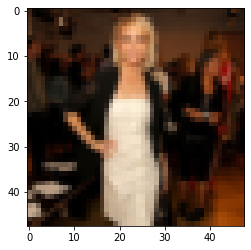

In [67]:
n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)
classes = ["Miranda Cosgrove", "Chris Martin", "Emma Stone", "Jamie Foxx", 
           "Steve Jobs", "Zac Efron", "Sandra Oh", "Taryn Manning"]

idx=np.reshape(np.where(Y_train[0:len(Y_train)]==n),(250))
print(len(Y_train[idx]))
plt.imshow(np.asarray(X_train[idx][0],dtype="uint8"))

In [68]:
#Downloading the data, if it does not exist
if not os.path.isfile('8_faces_test.hdf5'):
  urllib.request.urlretrieve("https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1","8_faces_test.hdf5")
h5f_X = h5py.File('8_faces_test.hdf5', 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'].value
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'].value
print(Y_test.shape)

['X_test_8_faces', 'Y_test_8_faces']
(400, 48, 48, 3)
(400,)


C:\Users\Markus\anaconda3\lib\site-packages\ipykernel_launcher.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
C:\Users\Markus\anaconda3\lib\site-packages\ipykernel_launcher.py:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  


In [69]:
np.min(X_train),np.max(X_train),np.min(X_test),np.max(X_test)
X_train /= 255
X_valid /= 255
X_test /= 255

## a) Training an CNN from scratch

Train a model (as shown below) from scratch, using the training data for training and the validation data for validation. For all activations in the hidden layer use the 'ReLU', for the last layer use softmax. Use 3x3 convolutions and use padding = same.

* Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy. 
* Calculate the accuracy on the test set (you should reach an accuracy of about 0.54)
* Calculate the confusion matrix
* Have a look at missclassified examples

Image of the network:
https://github.com/ioskn/mldl_htwg/blob/master/uebungen/dl_cnn_faces_net.png

In [70]:
# model
batch_size = 16
epochs = 50

# define network
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(15, kernel_size=3, strides=1, activation="relu", input_shape=(48, 48, 3), padding="same"))
model.add(keras.layers.Conv2D(15, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(2, strides=2, padding="same"))

model.add(keras.layers.Conv2D(30, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(keras.layers.Conv2D(30, kernel_size=3, strides=1, activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(4, strides=4, padding="same"))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(8, activation="softmax"))

# compile network
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 48, 48, 15)        420       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 48, 48, 15)        2040      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 24, 24, 30)        4080      
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 30)        8130      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 30)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1080)            

In [71]:
# fit network
Y_train_cat = keras.utils.to_categorical(Y_train)
Y_valid_cat = keras.utils.to_categorical(Y_valid)
fit_model = model.fit(X_train, Y_train_cat, batch_size=batch_size, epochs=epochs,
    validation_data=(X_valid, Y_valid_cat), verbose=2)

Epoch 1/50
125/125 - 7s - loss: 1.8852 - accuracy: 0.2685 - val_loss: 1.6579 - val_accuracy: 0.3700
Epoch 2/50
125/125 - 6s - loss: 1.5388 - accuracy: 0.4360 - val_loss: 1.4722 - val_accuracy: 0.4650
Epoch 3/50
125/125 - 6s - loss: 1.3218 - accuracy: 0.5395 - val_loss: 1.3641 - val_accuracy: 0.4925
Epoch 4/50
125/125 - 6s - loss: 1.1292 - accuracy: 0.6005 - val_loss: 1.2465 - val_accuracy: 0.5375
Epoch 5/50
125/125 - 6s - loss: 0.9457 - accuracy: 0.6715 - val_loss: 1.2838 - val_accuracy: 0.5550
Epoch 6/50
125/125 - 6s - loss: 0.7726 - accuracy: 0.7320 - val_loss: 1.2925 - val_accuracy: 0.5700
Epoch 7/50
125/125 - 6s - loss: 0.6225 - accuracy: 0.7835 - val_loss: 1.2074 - val_accuracy: 0.6150
Epoch 8/50
125/125 - 6s - loss: 0.5065 - accuracy: 0.8275 - val_loss: 1.3101 - val_accuracy: 0.5925
Epoch 9/50
125/125 - 6s - loss: 0.3839 - accuracy: 0.8635 - val_loss: 1.4846 - val_accuracy: 0.6400
Epoch 10/50
125/125 - 6s - loss: 0.2928 - accuracy: 0.9015 - val_loss: 1.6021 - val_accuracy: 0.6550

In [72]:
# evaluate network
Y_test_cat = keras.utils.to_categorical(Y_test)
train_score = model.evaluate(X_train, Y_train_cat)
test_score = model.evaluate(X_test, Y_test_cat)
print("Train data: Loss: {} | Accuracy: {}\nTest data: Loss: {} | Accuracy: {}".format(train_score[0], 
    train_score[1], test_score[0], test_score[1]))

13/13 [==============================] - 0s 20ms/step - loss: 3.5669 - accuracy: 0.6575
Train data: Loss: 0.03154013305902481 | Accuracy: 0.9884999990463257
Test data: Loss: 3.566882848739624 | Accuracy: 0.6575000286102295


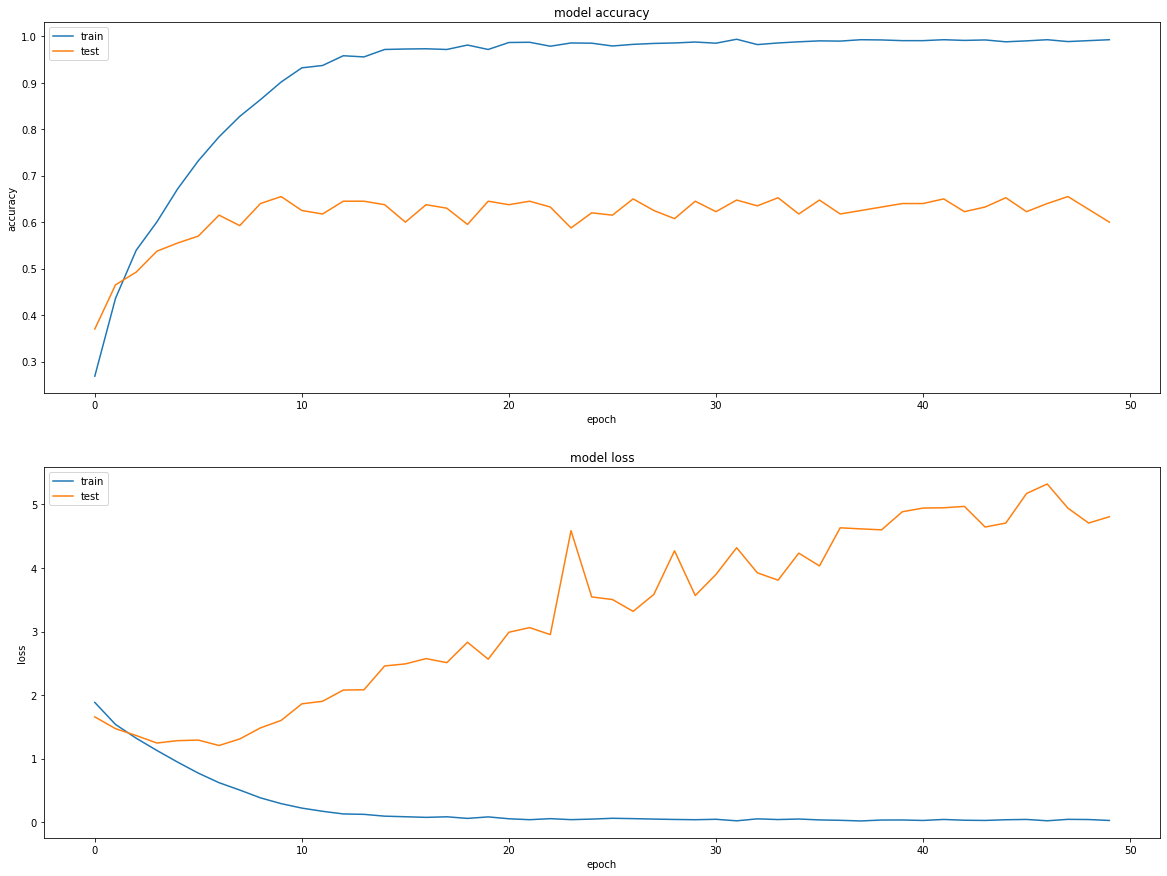

In [73]:
# plot results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
axes[0].plot(fit_model.history['accuracy'])
axes[0].plot(fit_model.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(fit_model.history['loss'])
axes[1].plot(fit_model.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left')

In [74]:
# confusion matrix
Y_pred = model.predict(X_test).argmax(axis=1) # select class with highest weight for predicted class
Y_test_max = Y_test_cat.argmax(axis=1)        # select class with highest weight for real class
matrix = confusion_matrix(Y_test_max, Y_pred)
print(matrix)

[[39  1  3  1  1  0  3  2]
 [ 3 26  2  3  3  6  1  6]
 [ 1  0 37  1  1  2  1  7]
 [ 4  4  1 24  3  1  4  9]
 [ 0  5  0  2 42  0  0  1]
 [ 0 12  0  1  0 30  5  2]
 [ 3  2  5  2  0  0 34  4]
 [ 4  6  5  0  1  2  1 31]]


In [75]:
# classification report
print(classification_report(Y_test_max, Y_pred, target_names=classes))

                  precision    recall  f1-score   support

Miranda Cosgrove       0.72      0.78      0.75        50
    Chris Martin       0.46      0.52      0.49        50
      Emma Stone       0.70      0.74      0.72        50
      Jamie Foxx       0.71      0.48      0.57        50
      Steve Jobs       0.82      0.84      0.83        50
       Zac Efron       0.73      0.60      0.66        50
       Sandra Oh       0.69      0.68      0.69        50
   Taryn Manning       0.50      0.62      0.55        50

        accuracy                           0.66       400
       macro avg       0.67      0.66      0.66       400
    weighted avg       0.67      0.66      0.66       400



[  3   4   5   6   7   8  10  15  16  20  21  23  24  25  26  27  28  30
  31  36  38  42  46  49  51  56  61  62  65  68  80  82  83  84  86  90
  91  92  94  95 104 105 107 109 112 113 116 120 121 143 148 152 155 159
 164 170 173 174 177 181 182 183 188 190 192 193 194 197 204 208 215 218
 222 227 230 231 232 233 236 237 238 240 248 249 251 254 257 259 267 269
 274 275 277 278 290 291 293 294 299 300 301 302 304 305 308 310 311 312
 313 315 316 317 321 324 325 329 335 336 339 342 344 346 347 350 352 356
 357 358 361 367 370 371 374 378 383 385 392]


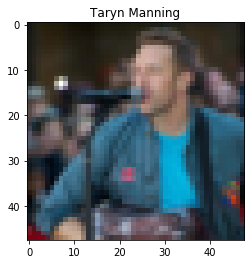

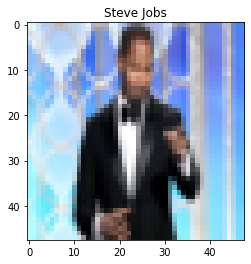

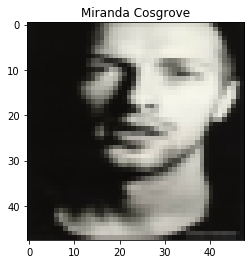

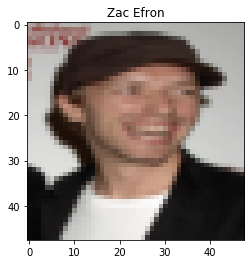

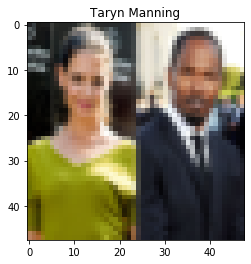

In [87]:
# missclassified images
ids = np.where(Y_pred != Y_test_max)[0]
print(ids)

for i in range(5):
    img = X_test[ids[i]]
    label = classes[Y_pred[ids[i]]]
    plt.imshow(img)
    plt.title(label)
    plt.show()

## b) Training using transfer learning
In transfer learning you use an existing trained model with given weights trained on a different task. You then add a few layers yourself and only train them. The model you add should look like:

```
my_dense1 (Dense)            (None, 512)               262656    
_________________________________________________________________
my_dense2 (Dense)            (None, 512)               262656    
_________________________________________________________________
my_dense3 (Dense)            (None, 100)               51300     
_________________________________________________________________
my_dense4 (Dense)            (None, 8)                 808       
```

Use the following code as a starting point:

In [88]:
from tensorflow.keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False,input_shape = (img_width, img_height, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [100]:
fc1 = base_model.output
fc1 = Flatten()(fc1)
#...
fc1 = Dense(512, activation="relu", name='my_dense1')(fc1)
fc1 = Dense(512, activation="relu", name='my_dense2')(fc1)
fc1 = Dense(100, activation="relu", name='my_dense3')(fc1)
#...
fc1 = Dense(8,activation='softmax', name='my_dense4')(fc1)
model_trans = tf.compat.v1.keras.Model(base_model.input, fc1) #Current hack for TF 2.0 and keras
model_trans.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [101]:
#base_model.summary()
for layer in model_trans.layers:
    name = layer.name
    if name.startswith('my'):
        layer.trainable = True
        print(name)
    else:
        layer.trainable = False

my_dense1
my_dense2
my_dense3
my_dense4


Do the same analysis as in a) above. You should get an accuracy of approx 0.61

In [103]:
# model
batch_size = 16
epochs = 15

# compile network
model_trans.compile(loss="categorical_crossentropy", metrics=["accuracy"])
# fit network
fit_model = model_trans.fit(X_train, Y_train_cat, batch_size=batch_size, epochs=epochs,
    validation_data=(X_valid, Y_valid_cat), verbose=2)

Epoch 1/50
125/125 - 23s - loss: 1.7491 - accuracy: 0.3495 - val_loss: 1.4726 - val_accuracy: 0.4700
Epoch 2/50
125/125 - 24s - loss: 1.3253 - accuracy: 0.5140 - val_loss: 1.3562 - val_accuracy: 0.5075
Epoch 3/50
125/125 - 23s - loss: 1.0987 - accuracy: 0.6085 - val_loss: 1.2140 - val_accuracy: 0.5825
Epoch 4/50
125/125 - 24s - loss: 0.8961 - accuracy: 0.6850 - val_loss: 1.3056 - val_accuracy: 0.5825
Epoch 5/50
125/125 - 24s - loss: 0.7094 - accuracy: 0.7510 - val_loss: 1.3810 - val_accuracy: 0.5625
Epoch 6/50
125/125 - 24s - loss: 0.5625 - accuracy: 0.7985 - val_loss: 1.4340 - val_accuracy: 0.5850
Epoch 7/50
125/125 - 23s - loss: 0.4252 - accuracy: 0.8530 - val_loss: 1.6484 - val_accuracy: 0.5575
Epoch 8/50
125/125 - 23s - loss: 0.3205 - accuracy: 0.8835 - val_loss: 2.0482 - val_accuracy: 0.5325
Epoch 9/50
125/125 - 22s - loss: 0.2534 - accuracy: 0.9115 - val_loss: 1.7919 - val_accuracy: 0.6100
Epoch 10/50
125/125 - 24s - loss: 0.1905 - accuracy: 0.9385 - val_loss: 2.1978 - val_accura

In [104]:
# evaluate network
train_score = model_trans.evaluate(X_train, Y_train_cat)
test_score = model_trans.evaluate(X_test, Y_test_cat)
print("Train data: Loss: {} | Accuracy: {}\nTest data: Loss: {} | Accuracy: {}".format(train_score[0], 
    train_score[1], test_score[0], test_score[1]))

13/13 [==============================] - 3s 247ms/step - loss: 5.5871 - accuracy: 0.6225
Train data: Loss: 0.04694754257798195 | Accuracy: 0.9900000095367432
Test data: Loss: 5.587145805358887 | Accuracy: 0.6225000023841858


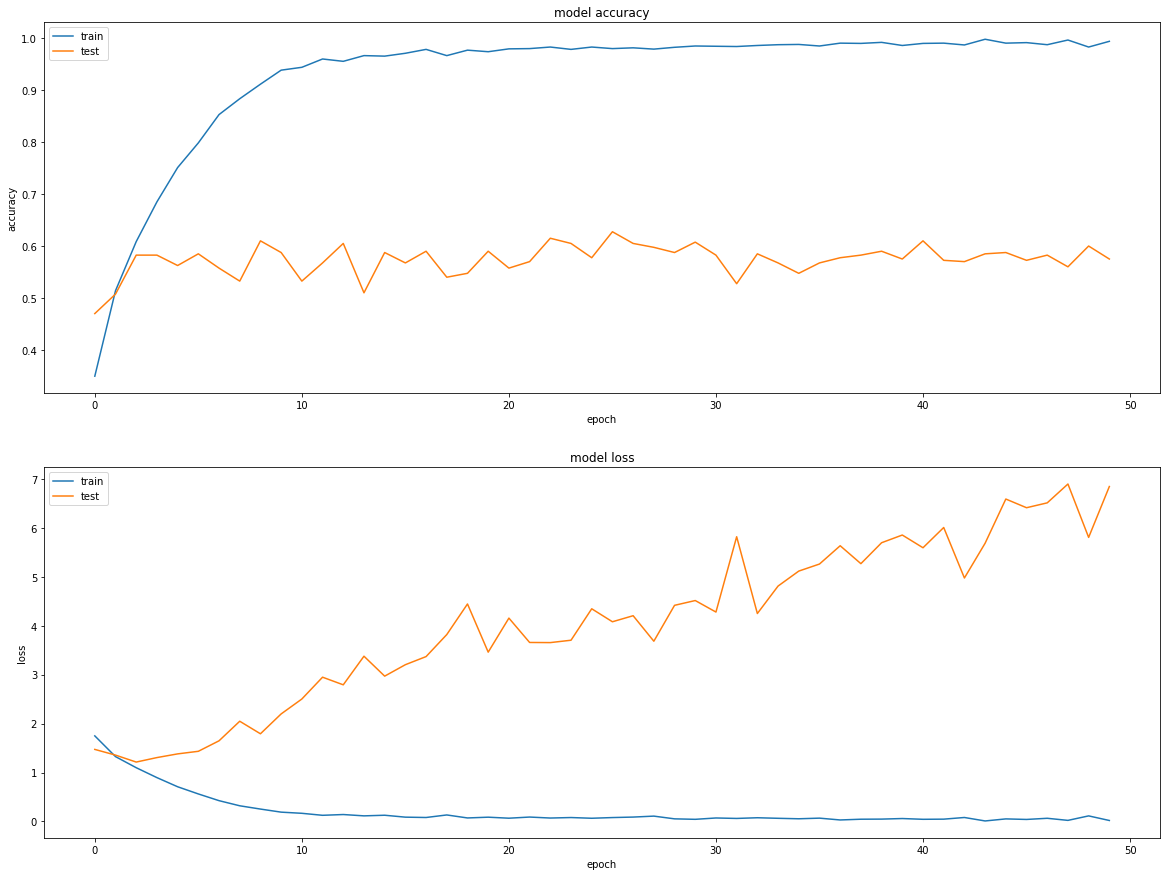

In [106]:
# plot results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
axes[0].plot(fit_model.history['accuracy'])
axes[0].plot(fit_model.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(fit_model.history['loss'])
axes[1].plot(fit_model.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left')

In [107]:
# confusion matrix
Y_pred = model_trans.predict(X_test).argmax(axis=1) # select class with highest weight for predicted class
Y_test_max = Y_test_cat.argmax(axis=1)        # select class with highest weight for real class
matrix = confusion_matrix(Y_test_max, Y_pred)
print(matrix)

[[30  0  0  0  0  1 13  6]
 [ 2 16  2  7  3  6 11  3]
 [ 1  2 35  0  0  1  6  5]
 [ 4  2  1 24  2  4  9  4]
 [ 0  3  0  0 44  0  3  0]
 [ 4  1  1  4  0 29  8  3]
 [ 3  0  1  0  0  1 43  2]
 [ 7  3  2  1  0  0  9 28]]


In [120]:
# classification report
print(classification_report(Y_test_max, Y_pred, target_names=classes))

                  precision    recall  f1-score   support

Miranda Cosgrove       0.65      0.70      0.67        50
    Chris Martin       0.33      0.52      0.41        50
      Emma Stone       0.77      0.72      0.74        50
      Jamie Foxx       0.55      0.42      0.48        50
      Steve Jobs       0.79      0.82      0.80        50
       Zac Efron       0.60      0.52      0.56        50
       Sandra Oh       0.76      0.68      0.72        50
   Taryn Manning       0.58      0.50      0.54        50

        accuracy                           0.61       400
       macro avg       0.63      0.61      0.61       400
    weighted avg       0.63      0.61      0.61       400



[  0   1   2   3   4   5   7  10  13  15  17  20  24  25  26  28  29  30
  33  36  39  43  48  53  62  66  67  68  69  70  75  78  79  80  83  84
  85  86  91  92  94  95  96  99 100 101 105 110 113 114 117 118 120 121
 123 126 127 131 135 139 140 142 143 144 147 151 152 158 159 162 167 175
 177 179 181 190 193 194 196 201 204 205 208 212 213 214 216 219 226 227
 228 232 233 234 236 237 238 240 241 244 245 255 259 262 263 267 269 271
 273 275 281 282 283 284 287 293 304 315 316 326 334 340 343 344 346 347
 348 350 352 358 361 363 365 366 367 369 370 372 373 374 379 383 384 388
 389 390 391 392 393 395 398]


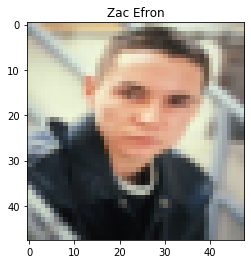

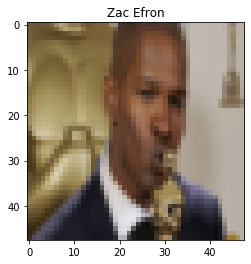

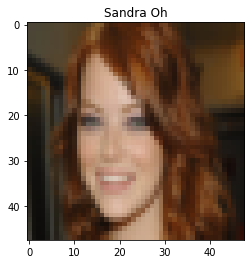

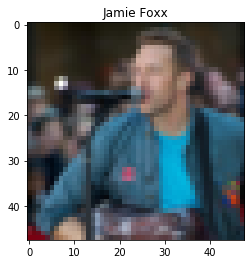

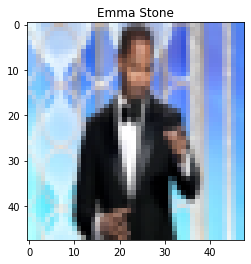

In [108]:
# missclassified images
ids = np.where(Y_pred != Y_test_max)[0]
print(ids)

for i in range(5):
    img = X_test[ids[i]]
    label = classes[Y_pred[ids[i]]]
    plt.imshow(img)
    plt.title(label)
    plt.show()

## c) Try to get better.

Ideas: use dropout and other tricks to prevent overfitting. Try to learn some convulutional layers as well.

In [131]:
from tensorflow.keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False,input_shape = (img_width, img_height, 3))

In [132]:
fc1 = base_model.output
fc1 = Flatten()(fc1)
#...
fc1 = Dense(512, activation="relu", name='my_dense1')(fc1)
fc1 = Dropout(0.5)(fc1)
fc1 = Dense(512, activation="relu", name='my_dense2')(fc1)
fc1 = Dropout(0.5)(fc1)
fc1 = Dense(100, activation="relu", name='my_dense3')(fc1)
fc1 = Dropout(0.5)(fc1)
#...
fc1 = Dense(8,activation='softmax', name='my_dense4')(fc1)
model_trans = tf.compat.v1.keras.Model(base_model.input, fc1) #Current hack for TF 2.0 and keras
model_trans.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [133]:
#base_model.summary()
for layer in model_trans.layers:
    name = layer.name
    if name.startswith('my'):
        layer.trainable = True
        print(name)
    else:
        layer.trainable = False

my_dense1
my_dense2
my_dense3
my_dense4


In [134]:
# model
batch_size = 10
epochs = 15

# compile network
model_trans.compile(loss="categorical_crossentropy", metrics=["accuracy"])
# fit network
fit_model = model_trans.fit(X_train, Y_train_cat, batch_size=batch_size, epochs=epochs,
    validation_data=(X_valid, Y_valid_cat), verbose=2)

Epoch 1/15
200/200 - 23s - loss: 2.1357 - accuracy: 0.1675 - val_loss: 1.8903 - val_accuracy: 0.3350
Epoch 2/15
200/200 - 23s - loss: 1.9256 - accuracy: 0.2595 - val_loss: 1.6773 - val_accuracy: 0.3875
Epoch 3/15
200/200 - 20s - loss: 1.7453 - accuracy: 0.3455 - val_loss: 1.5583 - val_accuracy: 0.4000
Epoch 4/15
200/200 - 21s - loss: 1.6359 - accuracy: 0.4025 - val_loss: 1.4332 - val_accuracy: 0.4575
Epoch 5/15
200/200 - 22s - loss: 1.5546 - accuracy: 0.4410 - val_loss: 1.3698 - val_accuracy: 0.5400
Epoch 6/15
200/200 - 25s - loss: 1.4666 - accuracy: 0.4835 - val_loss: 1.3383 - val_accuracy: 0.5475
Epoch 7/15
200/200 - 28s - loss: 1.4193 - accuracy: 0.5055 - val_loss: 1.3937 - val_accuracy: 0.5100
Epoch 8/15
200/200 - 25s - loss: 1.3413 - accuracy: 0.5305 - val_loss: 1.3282 - val_accuracy: 0.5550
Epoch 9/15
200/200 - 21s - loss: 1.2900 - accuracy: 0.5520 - val_loss: 1.3446 - val_accuracy: 0.5625
Epoch 10/15
200/200 - 20s - loss: 1.2512 - accuracy: 0.5630 - val_loss: 1.3497 - val_accura

In [135]:
# evaluate network
train_score = model_trans.evaluate(X_train, Y_train_cat)
test_score = model_trans.evaluate(X_test, Y_test_cat)
print("Train data: Loss: {} | Accuracy: {}\nTest data: Loss: {} | Accuracy: {}".format(train_score[0], 
    train_score[1], test_score[0], test_score[1]))

13/13 [==============================] - 3s 263ms/step - loss: 1.2604 - accuracy: 0.5575
Train data: Loss: 0.7195922136306763 | Accuracy: 0.7670000195503235
Test data: Loss: 1.2604385614395142 | Accuracy: 0.5575000047683716


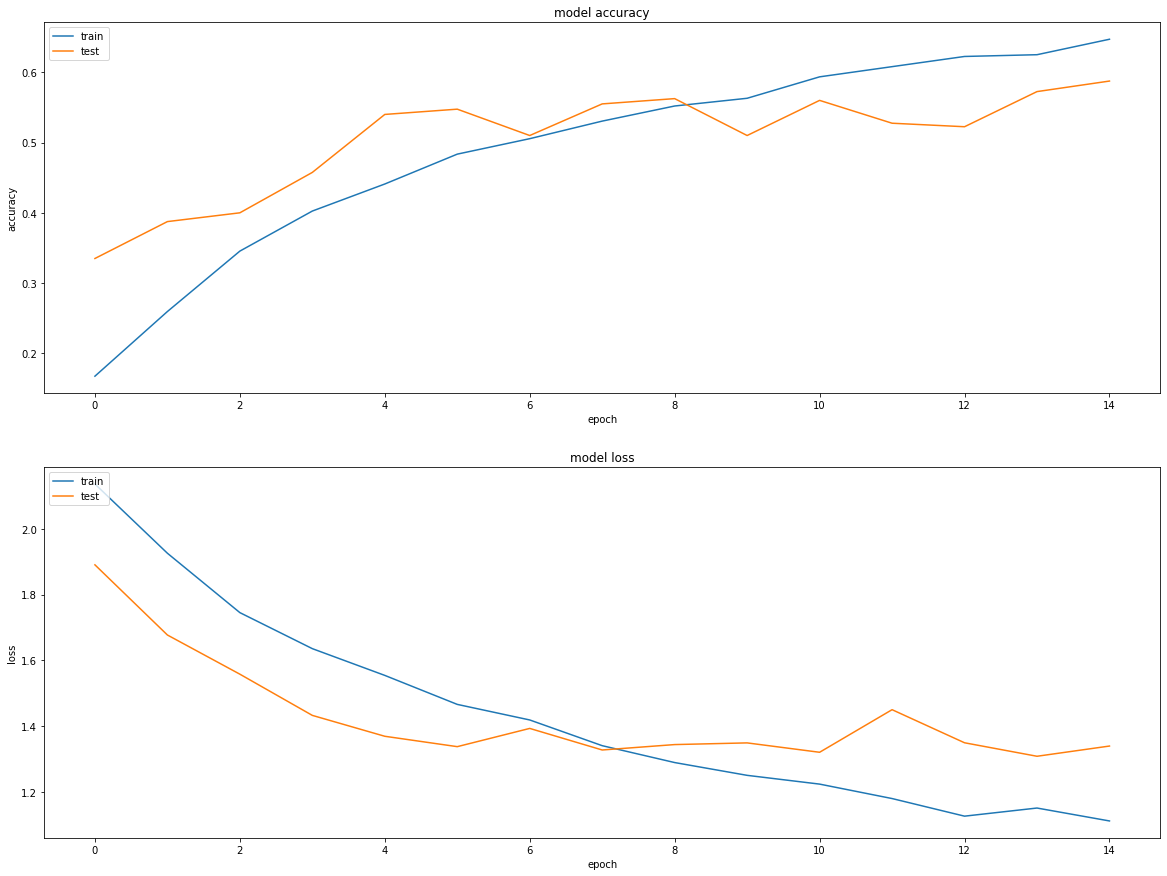

In [136]:
# plot results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
axes[0].plot(fit_model.history['accuracy'])
axes[0].plot(fit_model.history['val_accuracy'])
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['train', 'test'], loc='upper left')

axes[1].plot(fit_model.history['loss'])
axes[1].plot(fit_model.history['val_loss'])
axes[1].set_title('model loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['train', 'test'], loc='upper left')

In [137]:
# confusion matrix
Y_pred = model_trans.predict(X_test).argmax(axis=1) # select class with highest weight for predicted class
Y_test_max = Y_test_cat.argmax(axis=1)        # select class with highest weight for real class
matrix = confusion_matrix(Y_test_max, Y_pred)
print(matrix)

[[30  1  4  2  0  4  5  4]
 [ 1 16  1 17  4  7  2  2]
 [ 2  6 31  1  1  1  5  3]
 [ 1  6  2 24  4  5  3  5]
 [ 0 11  0  2 37  0  0  0]
 [ 3  5  2  9  1 25  3  2]
 [ 2  6  1  2  0  2 32  5]
 [ 2  6  6  5  0  1  2 28]]


In [138]:
# classification report
print(classification_report(Y_test_max, Y_pred, target_names=classes))

                  precision    recall  f1-score   support

Miranda Cosgrove       0.73      0.60      0.66        50
    Chris Martin       0.28      0.32      0.30        50
      Emma Stone       0.66      0.62      0.64        50
      Jamie Foxx       0.39      0.48      0.43        50
      Steve Jobs       0.79      0.74      0.76        50
       Zac Efron       0.56      0.50      0.53        50
       Sandra Oh       0.62      0.64      0.63        50
   Taryn Manning       0.57      0.56      0.57        50

        accuracy                           0.56       400
       macro avg       0.57      0.56      0.56       400
    weighted avg       0.57      0.56      0.56       400



[  0   2   4   5   6   7  10  13  14  17  18  20  22  24  25  27  29  30
  31  33  34  39  42  43  44  46  48  49  50  51  54  62  66  67  68  70
  71  75  78  79  80  81  83  84  86  87  90  91  92  95  96  97  99 100
 101 102 103 105 107 109 113 114 115 118 119 120 122 125 127 131 136 139
 140 141 142 143 144 147 149 151 158 159 160 162 167 170 177 181 185 188
 190 192 193 194 196 199 201 204 205 208 209 210 212 213 216 219 222 227
 228 230 231 233 234 236 239 240 242 251 262 263 264 266 267 269 271 273
 275 278 281 282 284 287 290 300 301 304 305 308 311 315 316 324 326 328
 330 331 339 340 341 342 343 346 347 348 350 352 355 361 363 364 365 366
 368 369 370 372 373 378 379 380 383 387 388 391 392 393 395]


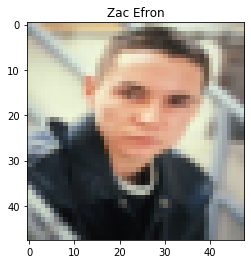

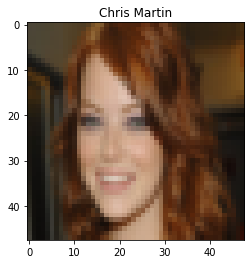

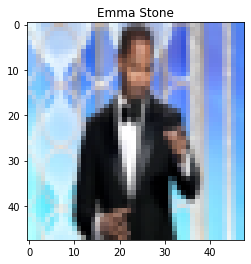

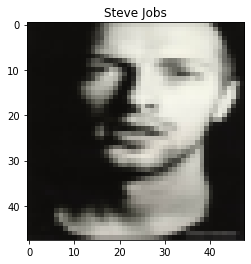

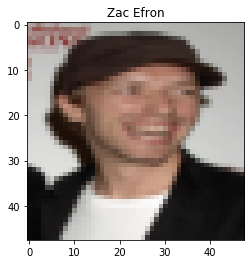

In [139]:
# missclassified images
ids = np.where(Y_pred != Y_test_max)[0]
print(ids)

for i in range(5):
    img = X_test[ids[i]]
    label = classes[Y_pred[ids[i]]]
    plt.imshow(img)
    plt.title(label)
    plt.show()